Data from https://www.kaggle.com/datasets/whenamancodes/predict-diabities

##### Data preprocessing

In [1]:
import numpy as np
import pandas as pd
import sklearn
sklearn.__version__

'1.2.1'

In [4]:
raw_df = pd.read_csv(r'/content/diabetes.csv')
raw_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
raw_df.shape

(768, 9)

In [8]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In some columns 0 means NaN

In [13]:
df_with_nan = raw_df
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df_with_nan[cols_with_zeros] = df_with_nan[cols_with_zeros].replace(0, np.nan)
df_with_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [14]:
df_with_nan.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


<AxesSubplot:>

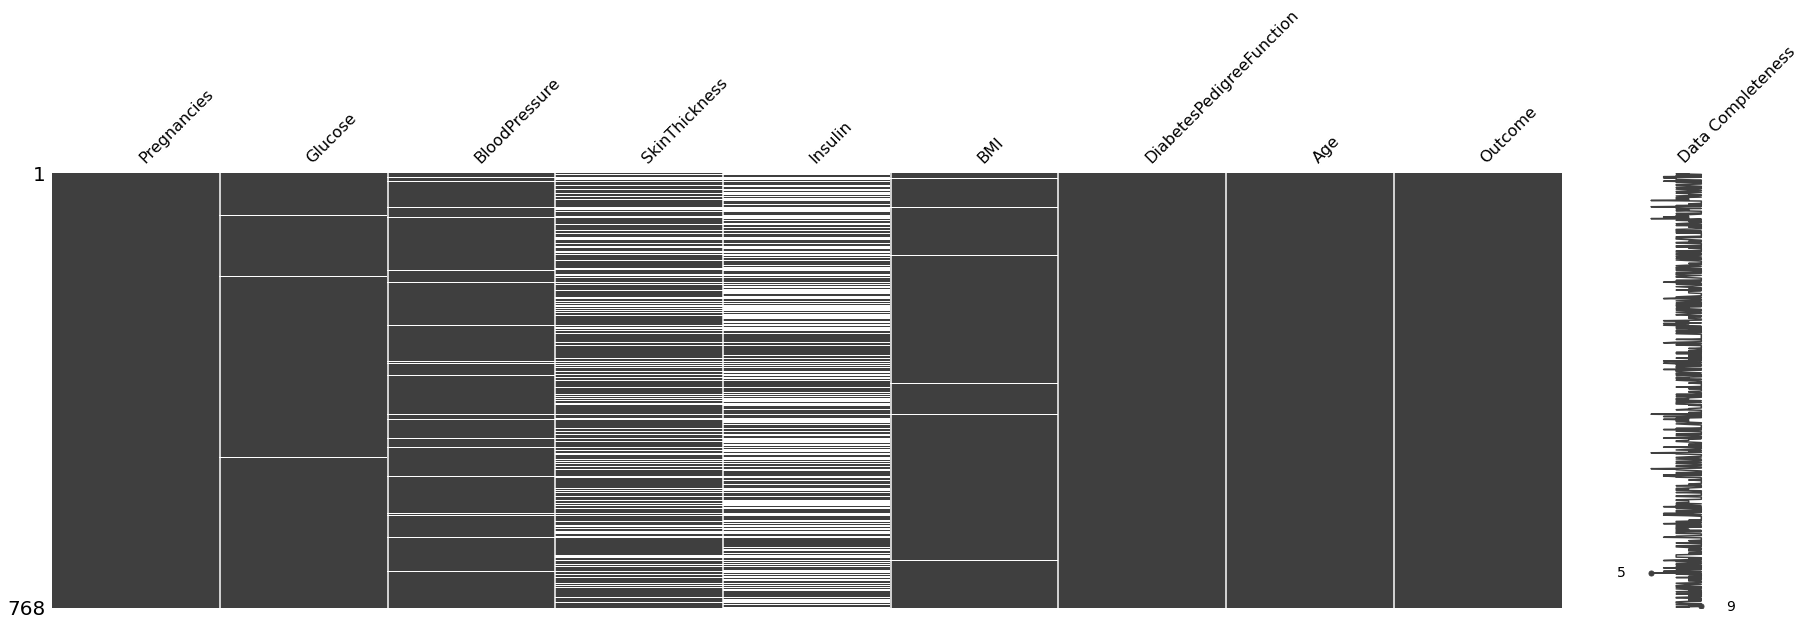

In [15]:
import missingno as msno

msno.matrix(df_with_nan, labels=True, figsize=(30, 8))

Due to high number of missing values in column 'Insulin', I decided to delete this column (although it can be useful).

In [17]:
df_with_nan.drop('Insulin', axis=1, inplace=True)
df_with_nan.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,26.6,0.351,31,0
2,8,183.0,64.0,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,43.1,2.288,33,1


<AxesSubplot:>

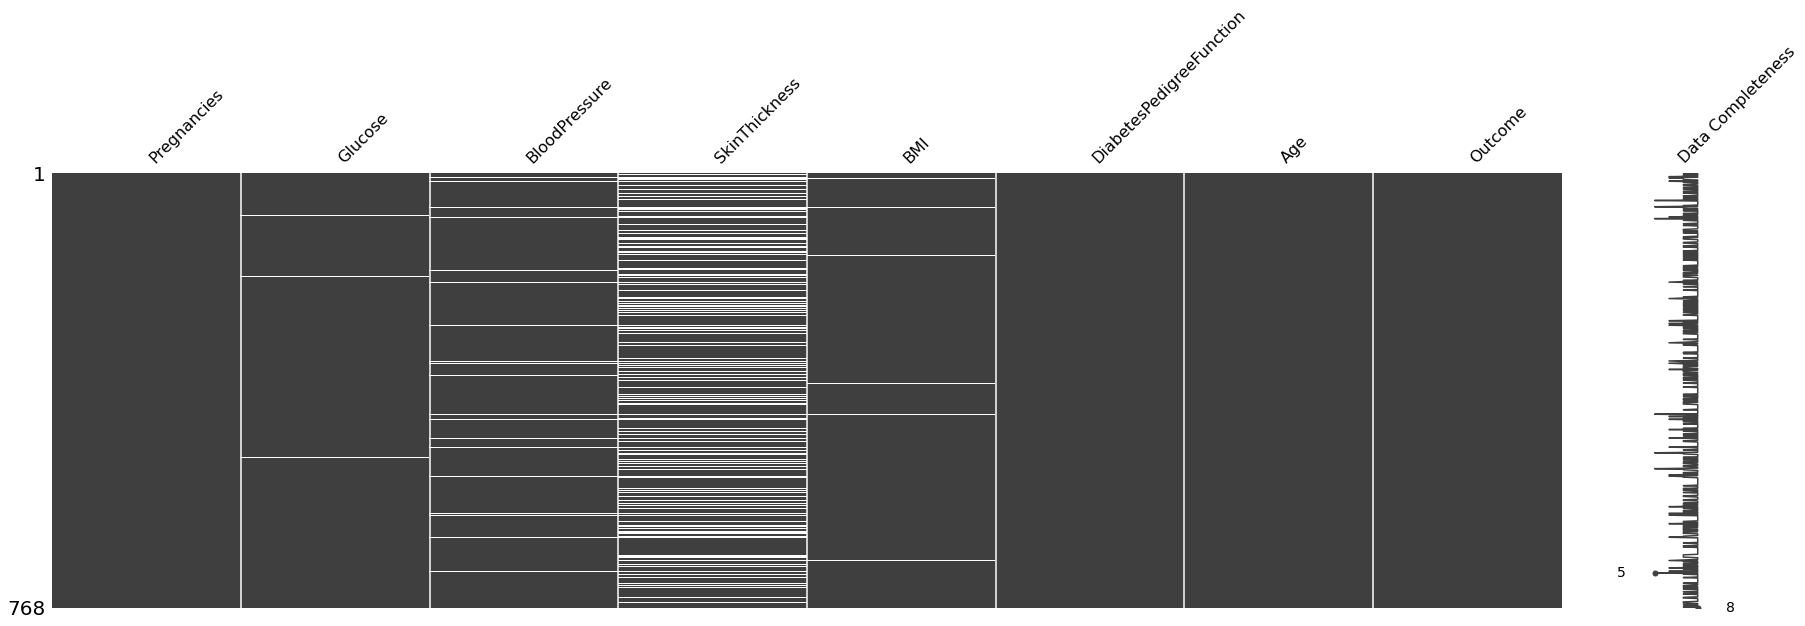

In [18]:
msno.matrix(df_with_nan, labels=True, figsize=(30, 8))

In [19]:
nans = df_with_nan.isna().sum()
nans

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [20]:
df_with_nan.dropna(subset=['BMI', 'Glucose'], inplace=True, axis=0)
df_with_nan.shape            

(752, 8)

<AxesSubplot:>

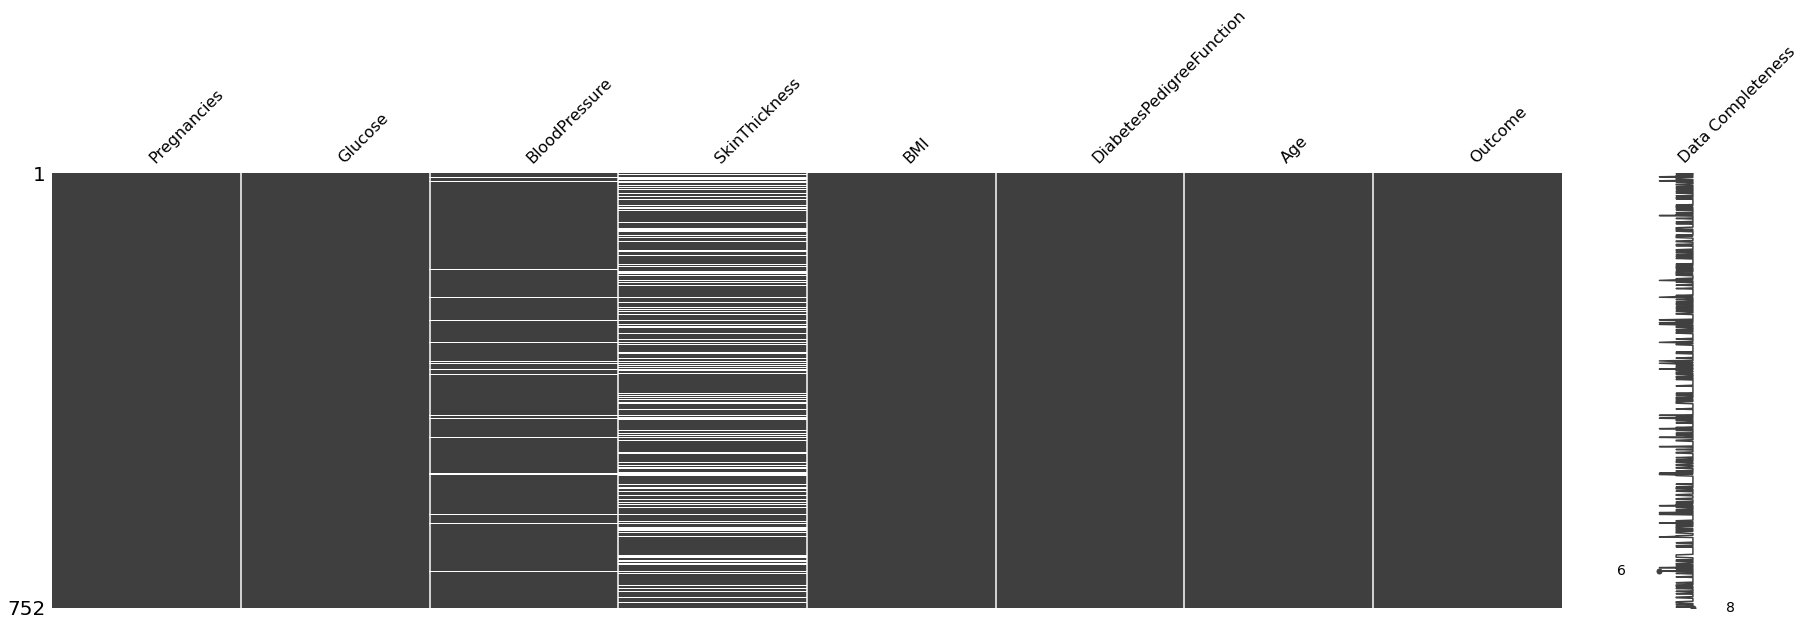

In [21]:
msno.matrix(df_with_nan, labels=True, figsize=(30, 8))

In [23]:
st_avg = round(df_with_nan['SkinThickness'].mean(), 2)
st_avg

29.17

In [24]:
bp_avg = round(df_with_nan['BloodPressure'].mean(), 2)
bp_avg

72.4

In [26]:
avgs = {'SkinThickness': st_avg,
        'BloodPressure': bp_avg}

df_with_nan.fillna(value=avgs, inplace=True)
df_with_nan.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00,33.6,0.627,50,1
1,1,85.0,66.0,29.00,26.6,0.351,31,0
2,8,183.0,64.0,29.17,23.3,0.672,32,1
3,1,89.0,66.0,23.00,28.1,0.167,21,0
4,0,137.0,40.0,35.00,43.1,2.288,33,1
5,5,116.0,74.0,29.17,25.6,0.201,30,0
6,3,78.0,50.0,32.00,31.0,0.248,26,1
7,10,115.0,72.4,29.17,35.3,0.134,29,0
8,2,197.0,70.0,45.00,30.5,0.158,53,1
10,4,110.0,92.0,29.17,37.6,0.191,30,0


<AxesSubplot:>

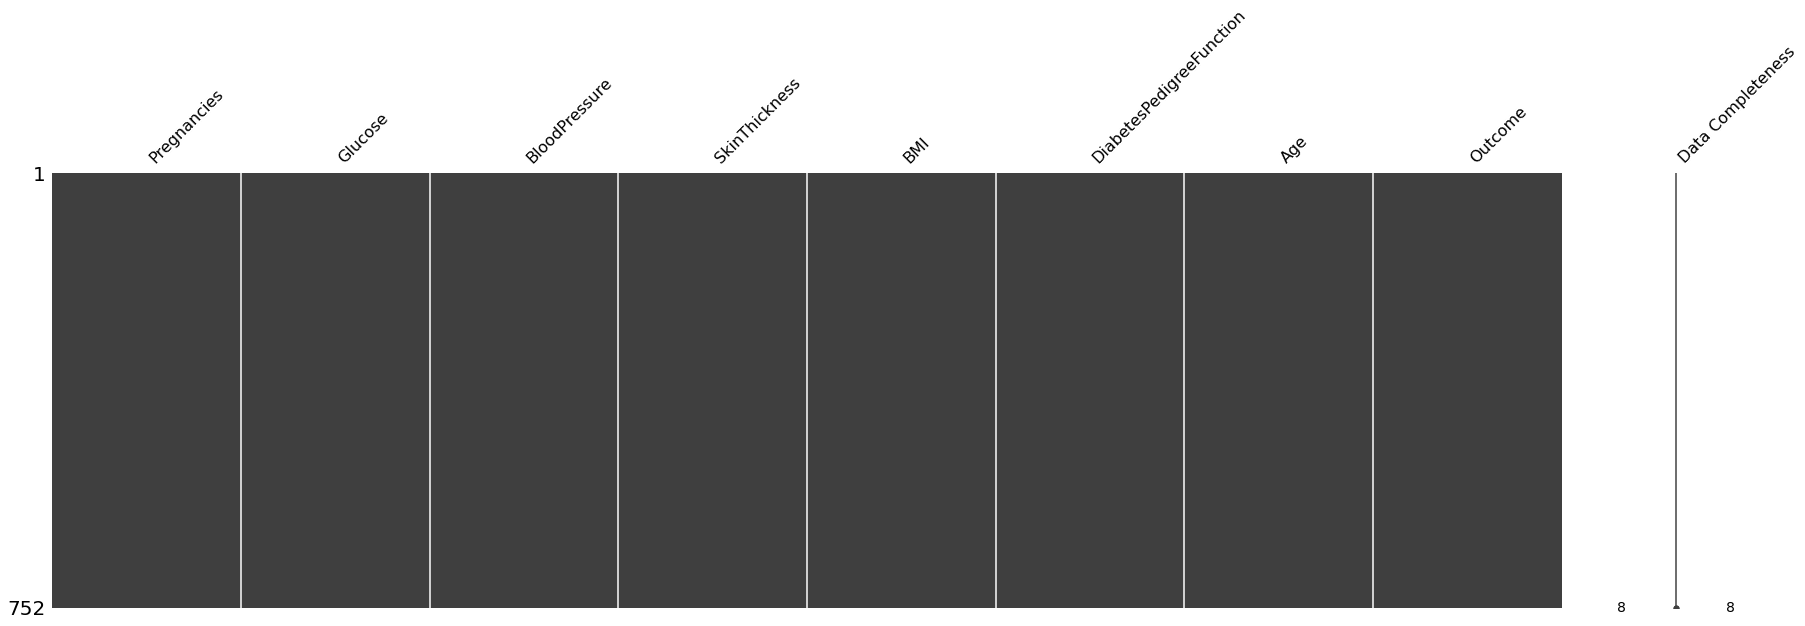

In [27]:
msno.matrix(df_with_nan, labels=True, figsize=(30, 8))

In [28]:
X = df_with_nan.copy()
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00,33.6,0.627,50,1
1,1,85.0,66.0,29.00,26.6,0.351,31,0
2,8,183.0,64.0,29.17,23.3,0.672,32,1
3,1,89.0,66.0,23.00,28.1,0.167,21,0
4,0,137.0,40.0,35.00,43.1,2.288,33,1


In [29]:
y = X.pop('Outcome')
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00,33.6,0.627,50
1,1,85.0,66.0,29.00,26.6,0.351,31
2,8,183.0,64.0,29.17,23.3,0.672,32
3,1,89.0,66.0,23.00,28.1,0.167,21
4,0,137.0,40.0,35.00,43.1,2.288,33


Reacalling the values

In [30]:
X = (X - X.min())/(X.max() - X.min())
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.670968,0.489796,0.304348,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.428571,0.239130,0.171779,0.116567,0.166667
2,0.470588,0.896774,0.408163,0.240978,0.104294,0.253629,0.183333
3,0.058824,0.290323,0.428571,0.173913,0.202454,0.038002,0.000000
4,0.000000,0.600000,0.163265,0.304348,0.509202,0.943638,0.200000


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [32]:
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape) 

X_train shape:  (601, 7)
y_train shape:  (601,)
X_test shape:  (151, 7)
y_test shape:  (151,)


#### Logistics Regression

In [33]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [37]:
y_prob = lr_classifier.predict_proba(X_test)
y_prob[:10]

array([[0.78009185, 0.21990815],
       [0.59738707, 0.40261293],
       [0.67269997, 0.32730003],
       [0.18322914, 0.81677086],
       [0.73806795, 0.26193205],
       [0.61917537, 0.38082463],
       [0.85794697, 0.14205303],
       [0.73866742, 0.26133258],
       [0.10516559, 0.89483441],
       [0.89237376, 0.10762624]])

In [38]:
y_pred = lr_classifier.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1])

In [39]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print('Accuracy: ', acc)

Accuracy:  0.7748344370860927


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

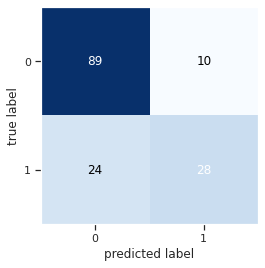

In [40]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sns
sns.set()

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.74      0.54      0.62        52

    accuracy                           0.77       151
   macro avg       0.76      0.72      0.73       151
weighted avg       0.77      0.77      0.76       151



#### K-neighbours


In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [2, 3, 4, 5, 7, 10, 15, 20]}

kn_classifier = KNeighborsClassifier()

kn_grid_search = GridSearchCV(kn_classifier, param_grid=param_grid, n_jobs=-1, scoring='accuracy', cv=10)
kn_grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [2, 3, 4, 5, 7, 10, 15, 20]},
             scoring='accuracy')

In [45]:
kn_grid_search.best_params_

{'n_neighbors': 10}

In [46]:
kn_y_pred = kn_grid_search.predict(X_test)
kn_y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1])

In [47]:
acc = accuracy_score(y_test, kn_y_pred)
print('Accuracy: ', acc)

Accuracy:  0.8079470198675497


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

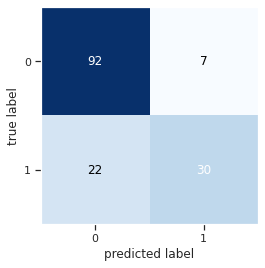

In [48]:
cm = confusion_matrix(y_test, kn_y_pred)
plot_confusion_matrix(cm)

In [59]:
print(classification_report(y_test, kn_y_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86        99
           1       0.81      0.58      0.67        52

    accuracy                           0.81       151
   macro avg       0.81      0.75      0.77       151
weighted avg       0.81      0.81      0.80       151



#### Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth' : [2, 3, 4, 5, 7, 9, 12, 15],
              'min_samples_leaf' : [1, 2, 3, 4, 5, 6]}


dt_classifier = DecisionTreeClassifier(random_state=42)

dt_grid_search = GridSearchCV(dt_classifier, param_grid=param_grid, n_jobs=-1, scoring='accuracy', cv=10)
dt_grid_search.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 7, 9, 12, 15],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6]},
             scoring='accuracy')

In [52]:
dt_grid_search.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 6}

In [53]:
dt_y_pred = dt_grid_search.predict(X_test)
dt_y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1])

In [54]:
acc = accuracy_score(y_test, dt_y_pred)
print('Accuracy: ', acc)

Accuracy:  0.7218543046357616


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

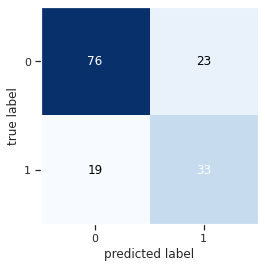

In [55]:
cm = confusion_matrix(y_test, dt_y_pred)
plot_confusion_matrix(cm)

In [57]:
print(classification_report(y_test, dt_y_pred))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78        99
           1       0.59      0.63      0.61        52

    accuracy                           0.72       151
   macro avg       0.69      0.70      0.70       151
weighted avg       0.73      0.72      0.72       151



#### Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators' : [20, 50, 100, 200],
              'criterion': ['gini', 'entropy'],
              'max_depth' : [2, 3, 4, 5, 7, 9, 12, 15],
              'min_samples_leaf' : [1, 2, 3, 4, 5, 6]}


rf_classifier = RandomForestClassifier(random_state=42)

rf_grid_search = GridSearchCV(rf_classifier, param_grid=param_grid, n_jobs=-1, scoring='accuracy', cv=10)
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 7, 9, 12, 15],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'n_estimators': [20, 50, 100, 200]},
             scoring='accuracy')

In [64]:
rf_grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'min_samples_leaf': 3,
 'n_estimators': 20}

In [65]:
rf_y_pred = rf_grid_search.predict(X_test)
rf_y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [66]:
acc = accuracy_score(y_test, rf_y_pred)
print('Accuracy: ', acc)

Accuracy:  0.7483443708609272


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

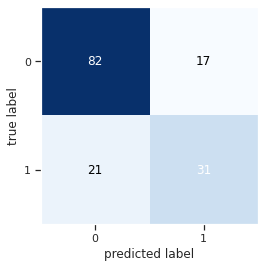

In [67]:
cm = confusion_matrix(y_test, rf_y_pred)
plot_confusion_matrix(cm)

In [68]:
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.65      0.60      0.62        52

    accuracy                           0.75       151
   macro avg       0.72      0.71      0.72       151
weighted avg       0.74      0.75      0.75       151



#### Light Gradient Boosting Machine

In [74]:
import lightgbm as lgb
lgb_clasifier = lgb.LGBMClassifier(n_jobs=-1, random_state=42)

lgb_clasifier.fit(X_train, y_train)
lgb_y_pred = lgb_clasifier.predict(X_test)

In [75]:
acc = accuracy_score(y_test, lgb_y_pred)
print('Accuracy: ', acc)

Accuracy:  0.7549668874172185


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

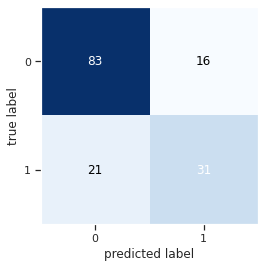

In [76]:
cm = confusion_matrix(y_test, lgb_y_pred)
plot_confusion_matrix(cm)

In [77]:
print(classification_report(y_test, lgb_y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.66      0.60      0.63        52

    accuracy                           0.75       151
   macro avg       0.73      0.72      0.72       151
weighted avg       0.75      0.75      0.75       151



#### Support Vector Machine

In [63]:
from sklearn.svm import SVC

param_grid = {'C': [0.8, 0.9, 1.0, 1.1, 1.2],
              'kernel': ['linear', 'poly', 'rbf']}

svc_classifier = SVC()

svc_grid_search = GridSearchCV(svc_classifier, param_grid=param_grid, n_jobs=-1, scoring='accuracy', cv=10)
svc_grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.8, 0.9, 1.0, 1.1, 1.2],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

In [69]:
svc_grid_search.best_params_

{'C': 0.9, 'kernel': 'linear'}

In [70]:
svc_y_pred = svc_grid_search.predict(X_test)
svc_y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1])

In [71]:
acc = accuracy_score(y_test, svc_y_pred)
print('Accuracy: ', acc)

Accuracy:  0.7748344370860927


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

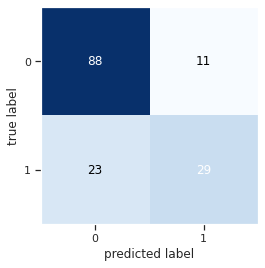

In [72]:
cm = confusion_matrix(y_test, svc_y_pred)
plot_confusion_matrix(cm)

In [86]:
print(classification_report(y_test, svc_y_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84        99
           1       0.72      0.56      0.63        52

    accuracy                           0.77       151
   macro avg       0.76      0.72      0.73       151
weighted avg       0.77      0.77      0.77       151

